In [1]:
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

EXCLUDE = ["par", "llar"]
def read_and_clean_data(filename):
    df = pd.read_csv(filename, parse_dates = ['time'])
    
    df["pospercent"] = df.pos / df.total
    
    df.pos = df.pos.astype(int)
    df.neg = df.neg.astype(int)
    df.total = df.total.astype(int)
    
    df["BTC_change"] = (df.BTC_price - df.BTC_price.shift(1))
    df["SPY_change"] = (df.SPY_price - df.SPY_price.shift(1))
    df["VXX_change"] = (df.VXX_price - df.VXX_price.shift(1))
    df["XAU_change"] = (df.XAU_price - df.XAU_price.shift(1))
    
    df["change"] = 100*(df.XRP_price.shift(-1) - df.XRP_price) / df.XRP_price

    df = df.drop(['XRP_price','BTC_price','SPY_price','VXX_price','XAU_price','labels','pos','neg','time','dom','VXX_change'], axis = 1)
    df = df.dropna()
    df = df.reset_index(drop = True)
    return df

In [2]:
def get_model(data):
    s = setup(data = data, target = 'change', silent = True, numeric_features = ["total"])
    m = compare_models(exclude = EXCLUDE)
    return m

## Day

In [3]:
day = read_and_clean_data("data/full_day.csv")
day_train, day_test = train_test_split(day, test_size = 0.20, random_state = 555 )
day_train, day_test = day_train.reset_index(drop = True), day_test.reset_index(drop = True)
day.head(5)

,total,pospercent,BTC_change,SPY_change,XAU_change,change
0,283,0.798587,-703.00,-0.9075,2.46825,0.026267
1,264,0.696970,156.75,0.0000,-1.27750,-0.019695
2,262,0.801527,67.75,-2.0350,3.14575,-0.019699
3,288,0.750000,437.50,3.4050,12.81750,-0.006568
4,290,0.724138,1042.75,3.8450,12.03250,-0.059113


In [4]:
mday = get_model(day_train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0281,0.0013,0.0328,-6.3233,0.0260,1.0435,0.3810
dummy,Dummy Regressor,0.0281,0.0013,0.0328,-6.3233,0.0260,1.0435,0.0040
lasso,Lasso Regression,0.0295,0.0013,0.0339,-6.5169,0.0267,1.3644,0.0030
en,Elastic Net,0.0296,0.0013,0.0341,-6.5304,0.0268,1.3925,0.0030
br,Bayesian Ridge,0.0288,0.0013,0.0330,-6.6046,0.0263,1.3713,0.0020
ridge,Ridge Regression,0.0294,0.0014,0.0339,-7.2234,0.0262,1.4526,0.0020
omp,Orthogonal Matching Pursuit,0.0315,0.0015,0.0363,-7.4443,0.0261,1.4553,0.0020
lar,Least Angle Regression,0.0315,0.0015,0.0366,-7.7307,0.0252,1.5731,0.0030
lr,Linear Regression,0.0315,0.0015,0.0366,-7.7319,0.0252,1.5734,0.3850
huber,Huber Regressor,0.0290,0.0014,0.0338,-8.0602,0.0258,1.2948,0.0040


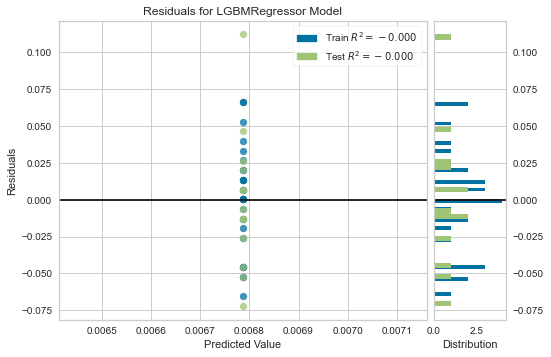

In [5]:
plot_model(mday)

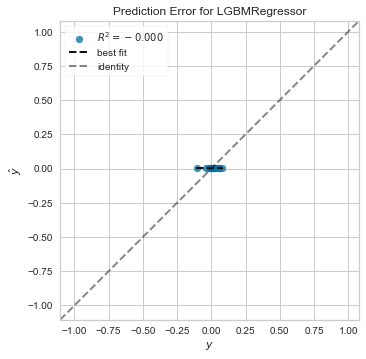

In [6]:
plot_model(mday, plot = 'error')

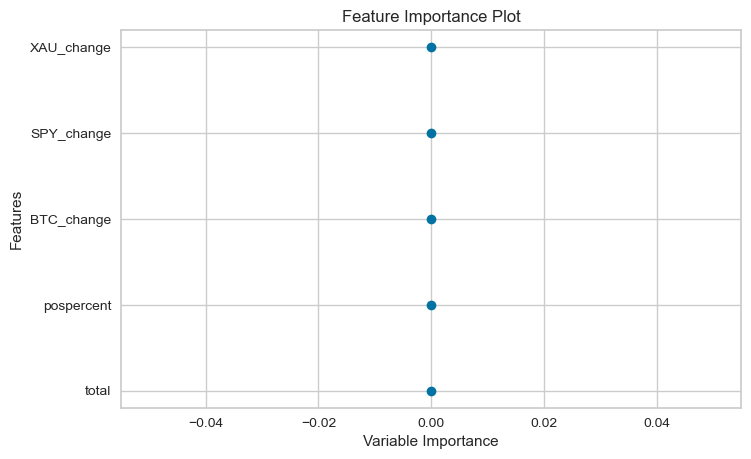

In [7]:
plot_model(mday, plot='feature')

In [8]:
plot_model(mday, save = True)
plot_model(mday, plot = 'error', save = True)
plot_model(mday, plot='feature', save = True)
#save_model(mday, "pc_day")

'Feature Importance.png'

## Hour

In [9]:
hour = read_and_clean_data("data/full_hour.csv")
hour_train, hour_test = train_test_split(hour, test_size = 0.25, random_state = 555)
hour_train, hour_test = hour_train.reset_index(drop = True), hour_test.reset_index(drop = True)
hour.head(5)

,total,pospercent,BTC_change,SPY_change,XAU_change,change
0,6,0.666667,7.00,0.0,-0.17575,-0.484932
1,5,0.800000,-601.00,0.0,1.05325,-0.612600
2,21,0.904762,-548.75,0.0,0.48325,0.693423
3,22,0.909091,19.50,0.0,-1.01825,1.732053
4,8,0.750000,-91.50,0.0,-1.34650,0.923077


In [10]:
mhour = get_model(hour_train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.5255,0.5590,0.7390,-0.0111,0.4457,1.0524,0.0030
en,Elastic Net,0.5255,0.5590,0.7390,-0.0111,0.4447,1.0563,0.0030
br,Bayesian Ridge,0.5256,0.5591,0.7391,-0.0114,0.4439,1.0577,0.0030
dummy,Dummy Regressor,0.5253,0.5589,0.7391,-0.0119,0.4623,0.9997,0.0040
huber,Huber Regressor,0.5267,0.5621,0.7411,-0.0171,0.4441,1.0851,0.0060
omp,Orthogonal Matching Pursuit,0.5269,0.5637,0.7422,-0.0200,0.4493,1.0801,0.0030
ridge,Ridge Regression,0.5285,0.5635,0.7421,-0.0203,0.4382,1.1150,0.0030
lr,Linear Regression,0.5286,0.5636,0.7421,-0.0205,0.4381,1.1154,0.0020
lar,Least Angle Regression,0.5286,0.5636,0.7421,-0.0205,0.4381,1.1154,0.0030
rf,Random Forest Regressor,0.5764,0.6291,0.7870,-0.1658,0.3659,2.0505,0.0780


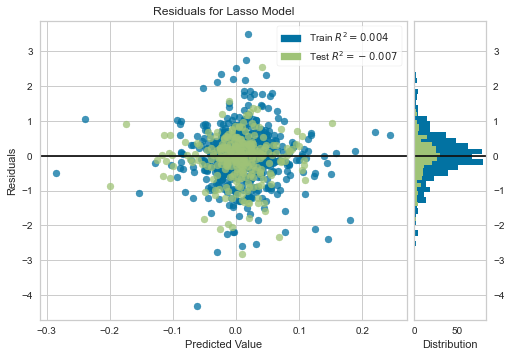

In [11]:
plot_model(mhour)

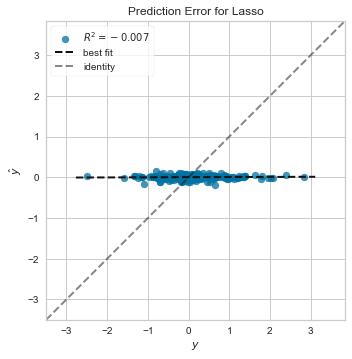

In [12]:
plot_model(mhour, plot = "error")

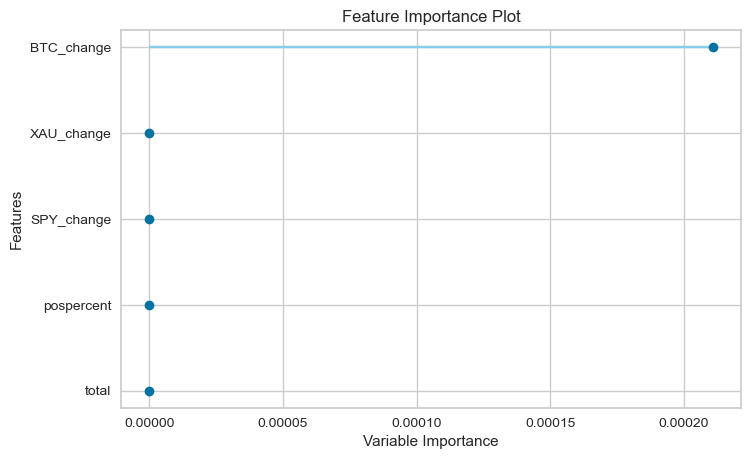

In [13]:
plot_model(mhour, plot = "feature")

In [14]:
plot_model(mhour, save = True)
plot_model(mhour, plot = "error", save = True)
plot_model(mhour, plot = "feature", save = True)
#save_model(mhour, "pc_hour")

'Feature Importance.png'

## Minute

In [15]:
minute = read_and_clean_data("data/full_minute.csv")
minute_train, minute_test = train_test_split(minute, test_size = 0.05, random_state = 555)
minute_train, minute_test = minute_train.reset_index(drop = True), minute_test.reset_index(drop = True)
minute.head(5)

,total,pospercent,BTC_change,SPY_change,XAU_change,change
0,2,1.0,-16.00,0.0,0.03750,-0.041300
1,1,1.0,-38.25,0.0,-0.09250,-0.055024
2,2,1.0,-17.00,0.0,0.13200,0.013790
3,2,1.0,11.25,0.0,-0.00725,0.068913
4,1,1.0,-3.50,0.0,0.14675,0.137410


In [16]:
mminute = get_model(minute_train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0615,0.0088,0.0931,-0.0008,0.0823,272547581.2897,0.0030
br,Bayesian Ridge,0.0614,0.0088,0.0931,-0.0008,0.0822,306502822.8076,0.0030
lr,Linear Regression,0.0615,0.0088,0.0931,-0.0015,0.0818,364629936.1988,0.0030
ridge,Ridge Regression,0.0615,0.0088,0.0931,-0.0015,0.0818,364999756.1988,0.0030
lar,Least Angle Regression,0.0615,0.0088,0.0931,-0.0015,0.0818,364632288.5438,0.0030
huber,Huber Regressor,0.0614,0.0088,0.0931,-0.0015,0.0825,216307490.2633,0.0120
lasso,Lasso Regression,0.0614,0.0088,0.0931,-0.0016,0.0831,75958561.7562,0.0030
en,Elastic Net,0.0614,0.0088,0.0931,-0.0016,0.0831,75958561.7562,0.0040
dummy,Dummy Regressor,0.0614,0.0088,0.0931,-0.0016,0.0831,75958561.7562,0.0030
gbr,Gradient Boosting Regressor,0.0624,0.0089,0.0940,-0.0206,0.0796,910060870.8906,0.0970


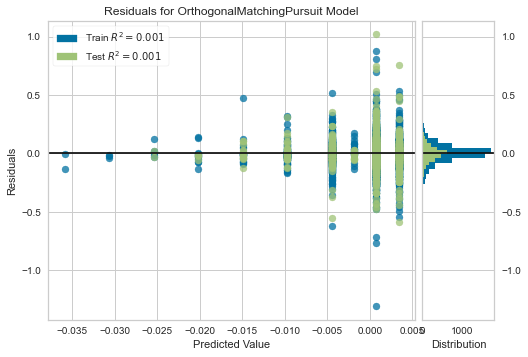

In [17]:
plot_model(mminute)

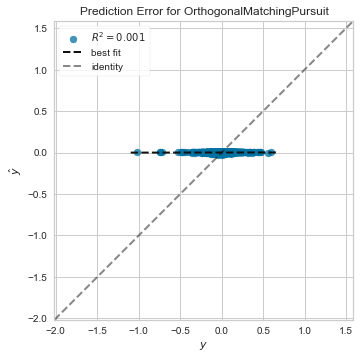

In [18]:
plot_model(mminute, plot = "error")

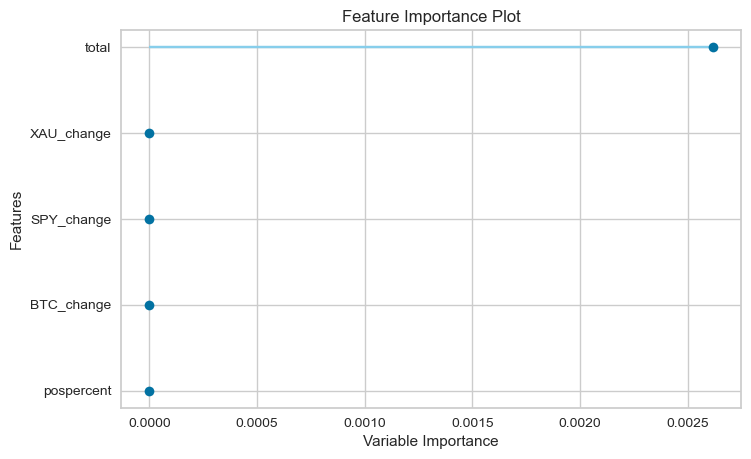

In [19]:
plot_model(mminute, plot = "feature")

In [20]:
plot_model(mminute, save = True)
plot_model(mminute, plot = "error", save = True)
plot_model(mminute, plot = "feature", save = True)
#save_model(mminute, "pc_minute")

'Feature Importance.png'